# TF2 CNN : Convlution Neural Network

### 합성곱 신경망
* Convolution Neural Network
* 합성곱 신경망
* 이미지 인식에 탁월한 효과
* 3가지 Layer
    * Convolution Layer
        * Feature 추출
        * ReLu 
    * Pooling Layer
        * Feature 중 중요한 것만 선택
    * Fully-Connected Layer
        * 최종 Feature들로 학습 및 예측
![image.png](https://i.imgur.com/kRGEr0H.png)


### 합성곱 연산
* 완전연결층은 입력값 모두에서 패턴을 찾기 때문에 입력값 모두가 변수고 가중치이다.
* Conv는 윈도우 크기(3x3)으로 나눠서 지역 패턴을 찾는다.
    * 학습된 패턴은 평행 이동 불편성을 갖는다
        * 고양이 눈이 화면 어디에 있든 중요하지 않다
        * 그냥 고양이 눈이다.
        * 만약 완전연결층이면 고양이 눈은 항상 거기 있어야 한다.
    * 패턴의 공간적 계층 구조를 학습할 수 있다
        * 단계를 여러번 두면 선이 면이 되고 면이 도형이 되서 점점 더 구체화
* Conv 층은 입력과 출력으로 특성맵(feature map)이라는 것을 사용
    * 3D 텐서 형식, (w, h, filter)
    * 최초 ConvD는 (w,h,c)인데 그 다음 부터는 필터를 지정한 대로 생성
    * 커널(윈도우)은 keras의 Conv2D(depth, (h, w))로 생성
        * (h, w)로 출력 크기가 결정, summary()로 확인

### 최대 풀링연산(MaxPool)
* 특성맵을 다운 샘플링하는 역할, 작게 만든다
    * 2x2크기의 윈도우로 걸쳐서 그 안에 있는 값 중 중 최대 값만 취한다.
    * 스트라이드는 보통 2
* 이걸 안하면?
    * 최종 층의 윈도우 영역은 최초 입력의 특정 영역에 대한 것만 반영
    * 파라미터가 너무 많아서 무조건 과대 적합
    * 어쨌든 크기를 줄이는게 목표
* 최대 풀링말고 평균값을 구하는 평균 풀링도 있다
    * 경험적 결과로 최대 풀링이 우수
    

* Demo : https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

### Convolution 연산과 필터
* 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한것
* kernel : 연산에 활용할 주변 픽셀 대상 선정
    * window, mask, filter 등의 이름으로 혼용
    * 커널 크기 : n x n
* 컨볼루션 연산으로 블러링, 샤프닝 등의 필터 적용
* CNN의 목표는 적절한 커널 학습
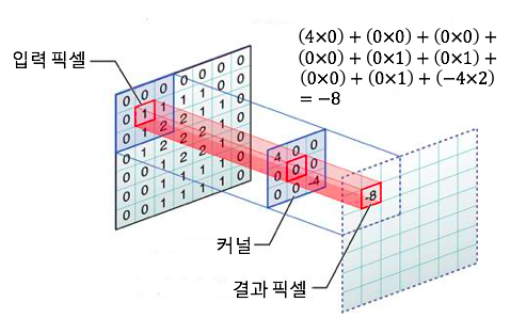

#### OpenCV를 이용한 Convolution 연산
* 평균 블러 필터

In [ ]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('../img/tkv.jpg')
print(img.shape)
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력

plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


#### 엣지 검출 필터

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('../img/tkv.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)


# 결과 출력
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(edge_gx, cmap='gray')
plt.subplot(132)
plt.imshow(edge_gy, cmap='gray')
plt.subplot(133)
plt.imshow(edge_gx + edge_gy, cmap='gray')
plt.show()

### 사물인식을 위한 8층 CNN
* Conv1 : convolution 계층에서 추출되는 정보, Edge와 Blob
* Conv3 : Texture -> Conv5 : 사물의 일부 -> FC: 사물의 클래스
* 깊은 Convolution Layer 
    * 복잡하고 추상화된 정보 추출
    * 뉴런이 반응하는 대상이 단순한 모양에서 고급 정보로 변화

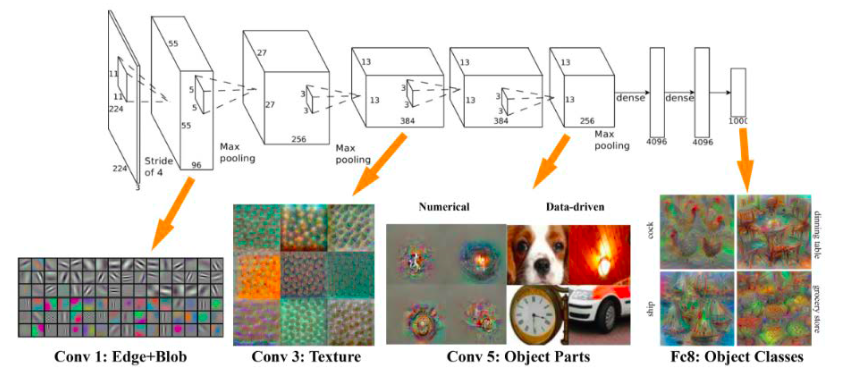

### 특징 추출
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

### 특징 추출2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

## TF Convolution
* `tf.nn.conv2d(input,filter=None,strides=None,padding=None,...)`
    * input : `[batch, height, width, channel]`
    * filter : `[height, width, in_channel, out_channel]`
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding : `{"SMAE":출력이 입력의 크기와 같다, "VALID"}`


In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

In [ ]:
x = np.float32(img.reshape(1,3,3,1))
print(x.shape)
filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(filter)
filter = tf.constant(filter)
stride = [1,1,1,1]
conv2d = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME
print(conv2d)
out = conv2d.numpy().reshape(2,2)
print(out)
plt.imshow(out, cmap='gray')

### Conv2d를 이용한 평균 블러링

In [ ]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)

(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

win_size = 5
filter = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
filter = filter.reshape(5,5,1,1)
filter = np.ones((win_size,win_size,1,1))/win_size**2

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')
blured = conv2d.numpy()
print(blured.shape)
blured = blured.reshape(h,w).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(blured, cmap='gray')


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg')

(h,w,c) = img.shape
x = img.reshape(1,h,w,c).astype(np.float32)

win_size = 5
filter = np.zeros((win_size,win_size,c,c), dtype=np.float32)
filter[:,:] = np.eye(3) * (1/(win_size**2))

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')
blured = conv2d.numpy()

#blured = blured.reshape(h,w,c).astype(np.uint8)
blured = np.squeeze(blured).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


### Conv2d를 이용한 엣지 검출

In [ ]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)

(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

conv2d = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = conv2d.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

conv2d = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = conv2d.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')


## TF Max Pool
* `tf.nn.max_pool(value, ksize, strides, padding...)`
    * value : input
    * ksize : window size, shape={1,2,4}, `[N, H, W, C]`
        * N: number of images(samples)
        * H : Height of the image
        * W : Width of the image
        * C : Channel(Color) count of the image
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding: `{"VALID", "SAME"}`

In [ ]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

In [ ]:
x = img.reshape(1,3,3,1)
pool = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
pooled = pool.numpy()
print(pooled)
plt.imshow(pooled.reshape(2,2), cmap='gray')

## MaxPool을 이용한 특징 검출

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pool = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
pooled = pool.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

# MNIST Low-Level 구현


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = (28,28,1)
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()
X_train, X_test = X_train[..., np.newaxis], X_test[..., np.newaxis]

X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]

y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]
y_train = np.eye(n_output)[y_train_label]
y_valid = np.eye(n_output)[y_valid_label]
y_test = np.eye(n_output)[y_test_label]


batch_size = 100
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)

initializer =  tf.initializers.GlorotUniform() #xavier
W1 = tf.Variable(initializer([3, 3, 1, 32]))
W2 = tf.Variable(initializer([3, 3, 32, 64]))
W3 = tf.Variable(initializer([7 * 7 * 64, 256]))
W4 = tf.Variable(initializer([256, 10]))

def model(X, training=False):
    L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
    L3 = tf.matmul(L3, W3)
    L3 = tf.nn.relu(L3)
    if training:
        L3 = tf.nn.dropout(L3, 0.5)
    hyperthesis = tf.matmul(L3, W4)
    return hyperthesis

n_epochs = 10
step = 0

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(n_epochs):
    for X_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:
            predict = model(X_batch, training=True)
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_batch, logits=predict))
        grads = tape.gradient(cost, [W1, W2, W3, W4])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, W3, W4]))
    
        is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_batch, axis=1))
        acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))                              
    
    predict = model(X_valid, training=True)
    is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_valid, axis=1))
    acc_val = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print(f"epoch:{epoch}, cost:{cost}, train accuracy:{acc_train}, validation accuracy:{acc_val}")

predict = model(X_test)
is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_test, axis=1))
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("Test Accuracy:{}".format(acc_test))

## MNIST, Keras API

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), #, input_shape=(n_input,)),  # 입력의 형태가 필요합니다.
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

## 잘 알려진 CNNs
* LeNet
* AlexNet
* GoogLeNet(Inception V1)
* SqueezNet
* VGGNet(VGG16 & VGG19)
* ResNet50
* Inception V3
* Xception
* MobileNet

#### Neural Network Visualization
* TensorSpace
    * https://tensorspace.org/index.html

### LeNet
* LeCun (얀 르쿤) 1998
* 최초의 CNN
* 손글씨 숫자 인식를 목표로 생성
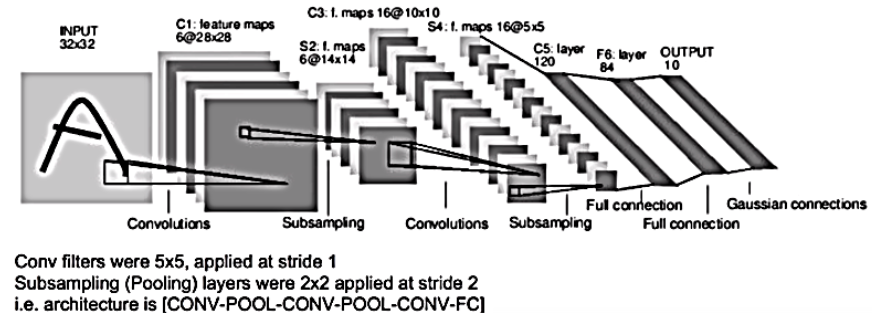


### LeNet-5 구성
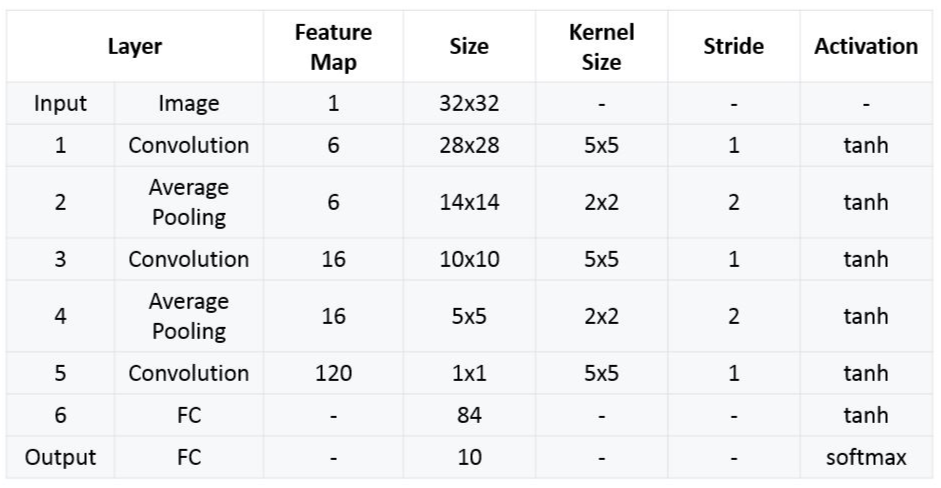

## LeNet CNN 생성 실습

### Hot dog VS Not hot dog
* https://www.youtube.com/watch?v=pqTntG1RXSY


In [1]:
%%html
<iframe width="786" height="442" src="https://www.youtube.com/embed/pqTntG1RXSY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### 1. Collecting Image Set - Hot dog
1. Open the Chrome and visit Google
2. Search "hog dog"
3. Scroll down until no hot dog image comes out
4. open developer console
5. add jQuery
```javascript
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js";
document.getElementsByTagName('head')[0].appendChild(script);
```
6. Grap the URLs

`var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });`

7. Download the URLs as a file
```javascript
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```

##### Python으로 이미지 다운로드

In [ ]:
!pip install requests

In [ ]:
import requests
import cv2
import os

img_path = './img/hotdog/'
file = open('./urls.txt')
urls = file.read()
urls = urls.strip().split('\n')
tot = 0

# loop the URLs
for url in urls:
    try:
        print(url)
        # try to download the image
        r = requests.get(url, timeout=60)

        # save the image to disk
        p = os.path.sep.join([img_path, "{}.jpg".format(
            str(tot).zfill(8))])
        f = open(p, "wb")
        f.write(r.content)
        f.close()

        # update the counter
        print("[INFO] downloaded: {}".format(p))
        tot += 1

        # handle if any exceptions are thrown during the download process
    except Exception as e:
        print("[INFO] error downloading {}...skipping".format(e))

##### 이미지 로딩 체크
로딩할 수 없는 이미지는 지운다.

In [ ]:
import glob

paths = glob.glob(img_path + "/*.*")

# loop over the image paths we just downloaded
for imagePath in paths:
    # initialize if the image should be deleted or not
    delete = False

    # try to load the image
    try:
        image = cv2.imread(imagePath)

        # if the image is `None` then we could not properly load it
        # from disk, so delete it
        if image is None:
            delete = True

    # if OpenCV cannot load the image then the image is likely
    # corrupt so we should delete it
    except:
        print("Except")
        delete = True

    # check to see if the image should be deleted
    if delete:
        print("[INFO] deleting {}".format(imagePath))
        os.remove(imagePath)

## 2. Model 생성 및 Trainging

### LeNet Model 생성
* Activation 함수를 tanh 대신 relu 사용

In [ ]:
import tensorflow as tf

def make_LeNet(width, height, depth, classes):
    inputShape = (height, width, depth)
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(16, (5, 5), padding="same"))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(120, (5, 5), padding="same"))
    model.add(tf.keras.layers.Activation("relu"))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation("relu"))

    model.add(tf.keras.layers.Dense(classes))
    model.add(tf.keras.layers.Activation("softmax"))

    return model

### LeNet Model 훈련

In [ ]:
%matplotlib inline

import matplotlib
#matplotlib.use("Agg")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

EPOCHS = 25
INIT_LR = 1e-3
BS = 32

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

model_path = "./trained_models/hotdog.h5"
dataset_path = './img/'
paths = glob.glob(dataset_path + "/**/*.*")

# grab the image paths and randomly shuffle them
imagePaths = sorted(paths)
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
   #image = img_to_array(image)
    data.append(image)

    label = imagePath.split(os.path.sep)[-2]
    label = 1 if label == "hotdog" else 0
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, fill_mode="nearest")

print("[INFO] compiling model...")
model = make_LeNet(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] training network...")
hist = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
                epochs=EPOCHS, verbose=1)

print("[INFO] serializing network...")
model.save(model_path)


for key in hist.history.keys():
    plt.plot(np.arange(0, EPOCHS), hist.history[key], label=key)
plt.title("Training Loss and Accuracy on Hotdog/Not Hotdog")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


### Hotdog/Not Hotdog Prediction Test

In [ ]:
!pip install imutils

In [ ]:
%matplotlib inline

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import glob
import matplotlib.pyplot as plt
import imutils

test_set_path = './img/examples/*.*'
model_path = "./trained_models/hotdog.h5"
test_imgs = glob.glob(test_set_path)
print(test_imgs)


print("[INFO] loading network...")
model = load_model(model_path)

for img in test_imgs:
    image = cv2.imread(img)
    orig = image.copy()

    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    #image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    # classify the input image
    (notHotdog, hotdog) = model.predict(image)[0]

    # build the label
    if hotdog > notHotdog:
        label = "Hotdog"
        proba = hotdog 
        color = (0,255,0)
    else: 
        label = "Not Hotdog"
        proba =  notHotdog
        color = (0,0,255)

    label = "{}: {:.2f}%".format(label, proba * 100)
    # draw the label on the image
    output = imutils.resize(orig, width=400)
    cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
        0.7, color, 2)

    plt.imshow(output[:,:,::-1])
    plt.title(label)
    plt.axis('off')
    plt.show()

## 그 밖에 잘 알려진 CNNs

### AlexNet
* 2012 이미지넷 대회 우승
* 알렉스 크리체프스키(Alex Krizhevsky)
* 제프리 힌튼 교수 팀
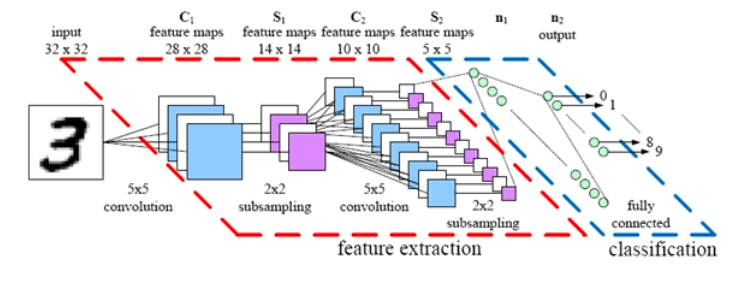

### AlexNet 구성
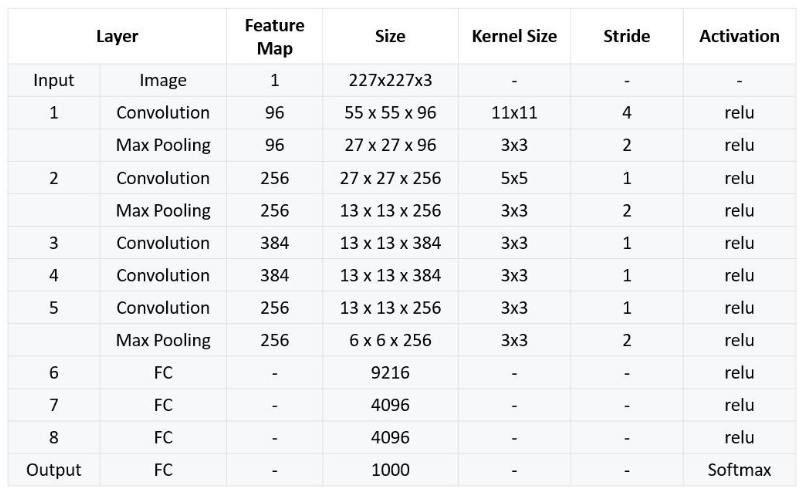

### GoogLeNet
* 구글 리서치, 크리스찬 세게디(Christian Szegedy)
* ILSVRC 2014 대회 우승
    * Top-5 Error 6.7%
* Inception Module
    * 서브 네트워크
    * 더 깊은  CNN
    * 더 효과적인 파라미터 사용
        * 사이즈가 다른 여러 필터를 연결
        * 더 깊지만 전체 파라미터 갯수는 VGG16/VGG19 보다 더 적음
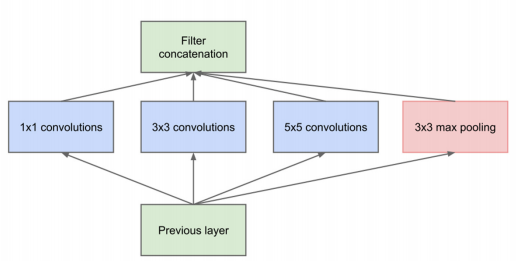
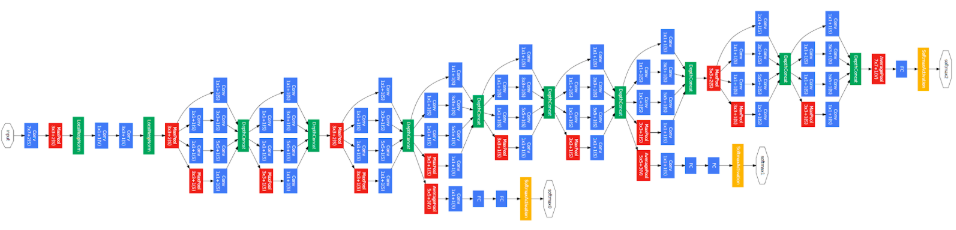

### GoogLeNet 구성
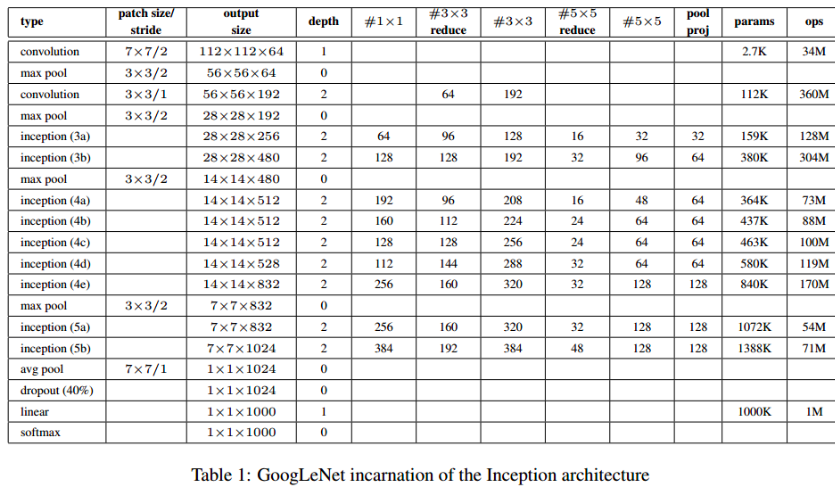

### SqueezeNet
* CNN 모델은 점점 깊어지는 추세
    * 모델의 크기가 커지고 파라미터 갯수가 많아진다.
    * 고성능 컴퓨팅 파워 필요
    * 저성능 컴퓨터에서는 훈련은 물론 예측도 불가능
* Landola(2016)의 논문에 의해 제안
    * AlexNet과 비슷한 정확도
    * 50배 적은 파라미터
    * 0.5mB 이하의 모델 크기를 자랑
    * Raspberry Pi 에서도 사용 가능
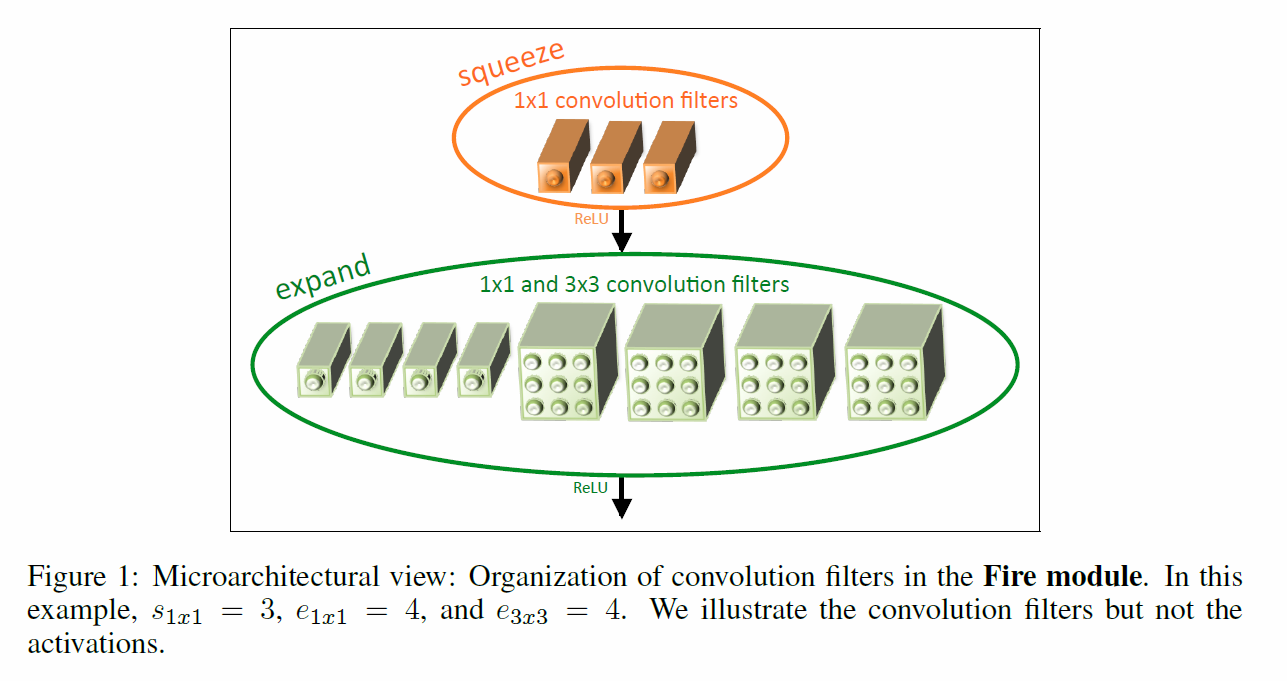

### VGGNet
* Simonyan, Zisserman 2014 "Very Deep Convolution Networks for Large Scale Image Recognition"
    * https://arxiv.org/abs/1409.1556
* 3x3 컨볼루션 레이어만 사용하는 것으로 유명
* VGG16(16Layers), VGG19(19Layers)
* 깊이 때문에 매우 느리다.

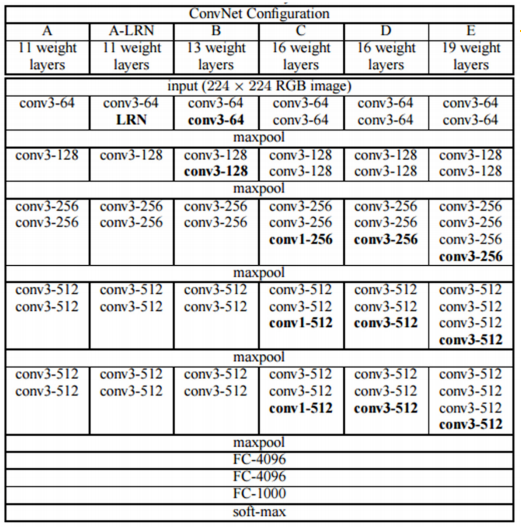

### Inception V3
* GoogLeNet의 Inception V1의 개선
* Inception V2, V3
* 초기 모델에서 개선된 진화
* 효과적인 컨볼루션 필터(7x7 필터)
* 향상된 표준화, 컨볼루션의 factorization


### MobileNet
* 무거운 Convolution Layer을 Fatorization으로 줄이다.
* Depthwise Separable Convlution
    * DepthWise와 PointWise를 분리
    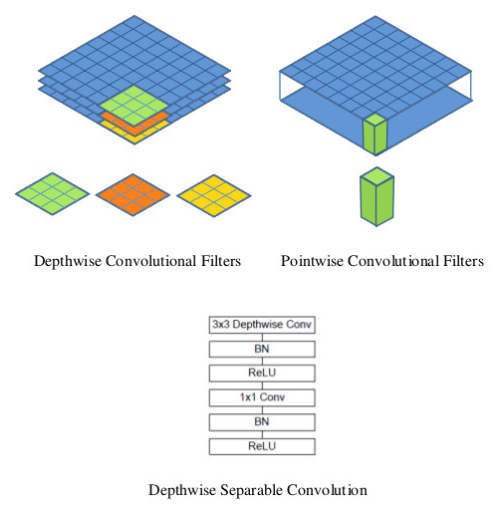
    * 계산량을  8~9배 줄이다.
    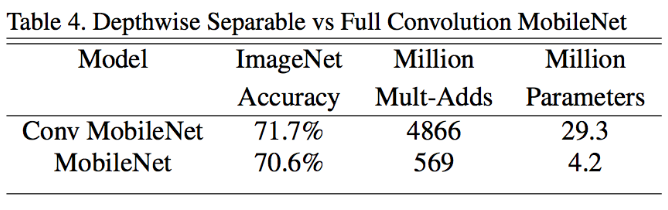

## Keras Image Classification Pre-trained Models on ImageNet 
* Xception
* VGG16
* VGG19
* ResNet, ResNetV2, ResNeXt
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

### API
* [`keras.applications`](https://keras.io/applications/)
    * download : `~/.keras/model/`

### Pre Trained Model
* ResNet50 Example
* `model = ResNet50(weights='imagenet')`
    * `model.predict(x)`

In [ ]:
%matplotlib inline

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)

## Transfer Learning 
* Pretrained Model 재사용하기

In [ ]:
# tfds 사용을 위한 추가 설치
!pip install tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs', split=list(splits),
    with_info=True, as_supervised=True)

In [ ]:
print(raw_train)
print(raw_validation)
print(raw_test)

### label , 0: cat, 1:dog

In [ ]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(f"{get_label_name(label)}({label})")

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

### Pre-trained MobileNet
* `tf.keras.applications.MobileNetV2()`
    * `input_shape` : (224,224,3)
    * `include_top` : 최상위 fully-connected layer(Classfification layers) 추가 여부
        * Transfer-learing에는 False 지정 필요
    * `weights` : weight 초기 로딩 방법
        * 'imagenet' : ImageNet으로 pre-train 된 weights로 초기화
        * file_path : 로딩할 weight 파일 경로
        * None : random initializtion

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

In [ ]:
%matplotlib inline 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

base_model2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
base_model2.summary()
img_path = './img/flower.jpg'
img = image.load_img(img_path, target_size=(160, 160))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = base_model2.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)

In [ ]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

### Feature extraction - base model 잠그기
* pre-trained model은 학습이 하지 않고 그대로 유지
* `base_model.trainable = False`

In [ ]:
base_model.trainable = False
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

### 새로운 모델 생성

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)

### 새로운 모델의 학습전 정확도
* 매우 낮음

In [ ]:
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

### 학습 시작

In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 새 모델의 학습 후 정확도
* 매우 높음

In [ ]:
loss_after,accuracy_after = model.evaluate(validation_batches, steps = validation_steps)


In [ ]:
print("transfer-trained loss: {:.2f}".format(loss_after))
print("trainsfer-trained accuracy: {:.2f}".format(accuracy_after))

### 개, 고양이 예측 실험

In [ ]:
%matplotlib inline 

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

cat_path = './img/cat.jpg'
dog_path = './img/dog.jpg'

img_cat = image.load_img(cat_path, target_size=(160, 160))
x_cat = image.img_to_array(img_cat)
x_cat = np.expand_dims(x_cat, axis=0)
x_cat = preprocess_input(x_cat)


img_dog = image.load_img(dog_path, target_size=(160, 160))
x_dog = image.img_to_array(img_dog)
x_dog = np.expand_dims(x_dog, axis=0)
x_dog = preprocess_input(x_dog)

preds_dog = model.predict(x_dog)
preds_cat = model.predict(x_cat)
print(f"preds_dog:{preds_dog}, preds_cat:{preds_cat}")
cat_title =  'dog' if tf.sigmoid(preds_cat)> 0.5 else 'cat'
dog_title =  'dog' if tf.sigmoid(preds_dog)> 0.5 else 'cat'

plt.figure()
plt.imshow(img_cat)
plt.title(cat_title)
plt.figure()
plt.imshow(img_dog)
plt.title(dog_title)

### File tuning
* 미세 조정을 위한 transfer-learning
* 기존 모델도 학습 필요
    * `base_model.trainable = True`
* 특정 레이어에서 부터 학습 시작, 이전은 잠그기
    * layer 100
    * layer.trainable = False

In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

### Fine tune 학습 시작

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch = initial_epochs,
                         validation_data=validation_batches)

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss_after2,accuracy_after2 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
print("fine tuned loss 2: {:.2f}".format(loss_after2))
print("fine tuned accuracy 2: {:.2f}".format(accuracy_after2))